# Daten einlesen

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

In [22]:
# Importing the dataset
dataset = pd.read_excel('diabetes-1698240260.xlsx', sheet_name='data', header=2, usecols="A:I")

In [23]:
dataset.head()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [24]:
dataset.describe()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Beschreibung der Merkmale:
- n_Pregnant ist stetig und verhältnisskaliert
- gtt ist stetig und verhältnisskaliert
- blood_pressure ist stetig und verhältnisskaliert
- triceps_skin_fold_thickness ist stetig und verhältnisskaliert
- insulin ist stetig und verhältnisskaliert
- bmi ist stetig und verhältnisskaliert
- dpf ist stetig und ordinal
- age ist stetig und verhältnisskaliert
- class ist diskret und nominal

# Exploration

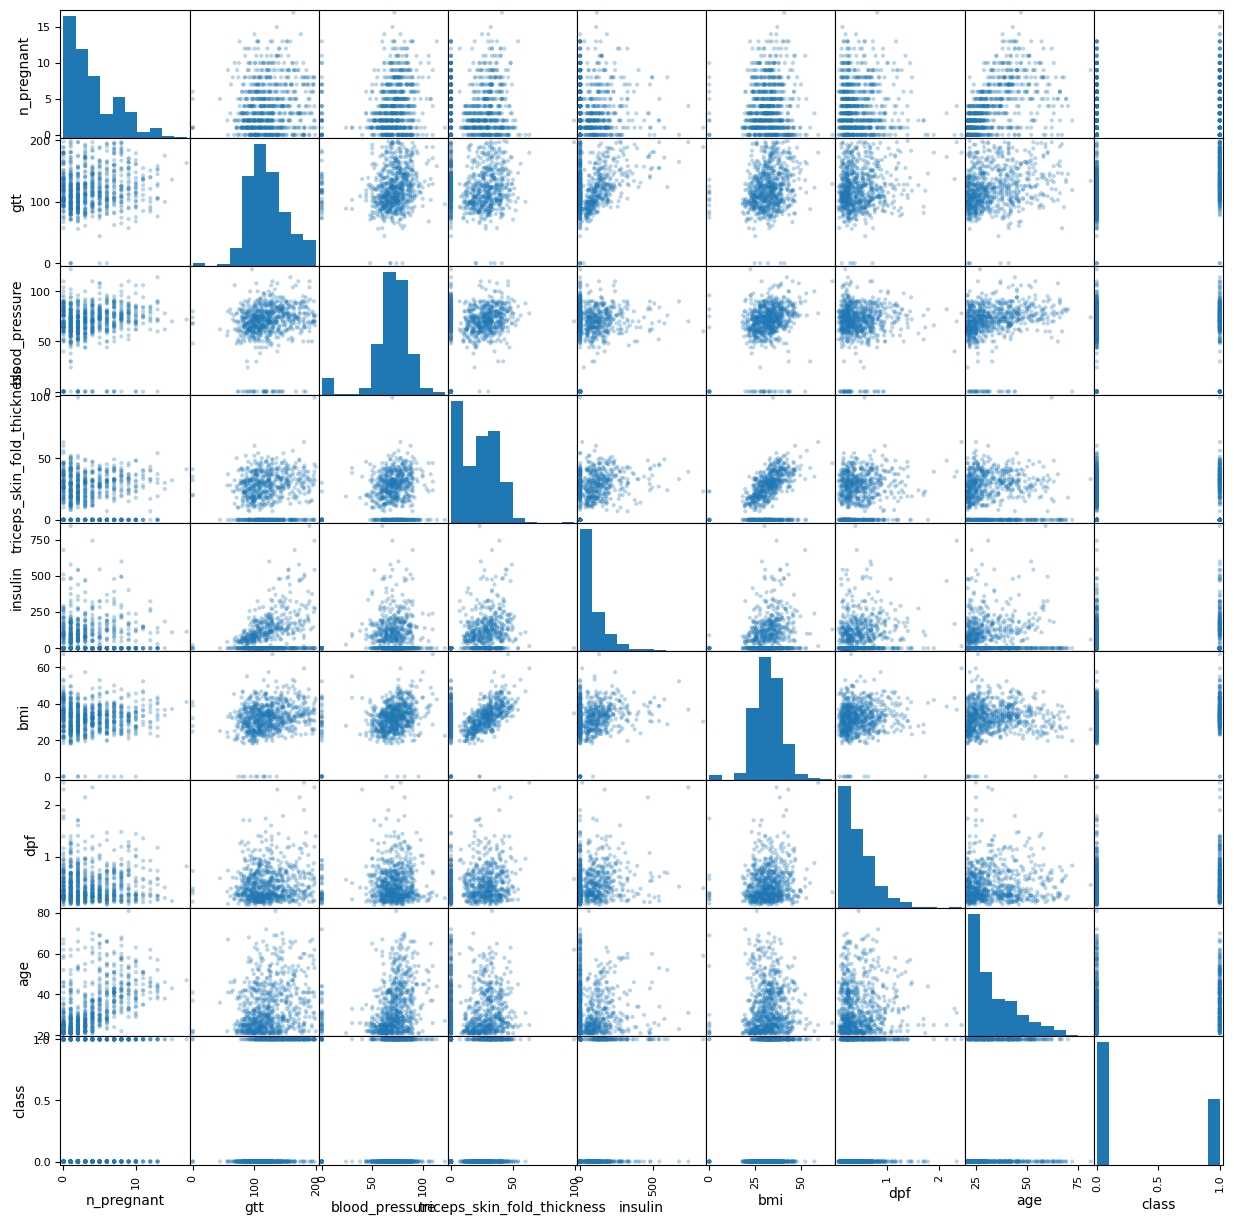

In [30]:
# Bennenungen der Spalten 45 grad drehen
scatter_matrix(dataset, alpha=0.3, figsize=(15, 15), diagonal='hist')
plt.show()